# SunRGB Data Analysis on the x, y, z, coordinates distributions of objects

## Processing the Numpy files:

In [1]:
## Open a .npy file
import numpy as np
import matplotlib.pyplot as plt
import sys

filename = "3d_visualizations/000001_bbox.npy"
data = np.load(filename)
print(data.shape)
print(data)

(3, 8)
[[ 1.047307    4.168696   -0.246859    1.151035    0.943792    0.984807
   1.69564944  1.        ]
 [ 2.431818    4.840909   -0.75        0.273673    0.287264    0.45
   1.65393706  6.        ]
 [-1.086364    1.904545   -0.147727    0.356405    0.781567    1.052273
   0.1022069   5.        ]]


Understanding the Array Structure:
* Each sub-array (row) is a bounding box.
* First three columns tell us the center coordinates of the bounding box
* Next three columns tell us the size of the bounding box
* Second last column tells us the angle of the bounding box
* Last column is the class of the bounding box

In [2]:
## Open a .npz file
filename = "3d_visualizations/000001_pc.npz"
data = np.load(filename)
print(data.files)
print(data['pc'].shape)

pc = data['pc']
print(pc)

# Extracting x, y, z coordinates
x = pc[:, 0]
y = pc[:, 1]
z = pc[:, 2]

['pc']
(50000, 6)
[[-0.13692206  3.207896   -1.193742    0.58431375  0.58431375  0.5764706 ]
 [-0.711127    1.9399852  -1.1960868   0.654902    0.64705884  0.6509804 ]
 [-0.25871503  5.5842195   0.70755565  0.7411765   0.80784315  0.7372549 ]
 ...
 [-0.9264188   1.3429244   0.16825275  0.32941177  0.21176471  0.21960784]
 [-0.9062335   2.9011097  -0.49964306  0.18039216  0.1254902   0.1254902 ]
 [-0.56909055  1.9241513  -1.2035404   0.65882355  0.6509804   0.654902  ]]


Dimensions of the Array:
* 50000 represents the number of points in the point cloud.
* 6 likely represents the dimensions or features of each point.


Interpreting the Features:

The six features in each point could represent various data depending on the context. Typically, these could include:
* x, y, z: Cartesian coordinates of each point in 3D space.
* r, g, b: Color values for each point, often stored as red, green, and blue components. Alternatively, these could also be normal vectors or additional spatial information like intensity or return magnitude if dealing with LiDAR data.

## Analysing distributions of coordinates of bounding boxes

In [77]:
# Import module
import os
 
# Assign directory
directory = r"sunrgbd_v1_pc_bbox_50k_val"

def load_data(directory):
    class_dict = {}
 
    # Iterate over files in directory
    for name in sorted(os.listdir(directory)):
        # Read content of .npy files:
        if name.endswith(".npy"):
            data = np.load(os.path.join(directory, name))
            # print(f"{name}: shape: ", data.shape)

            if "103" in name:
                print(name)
                print(data)
            
            # Iterate through rows of the numpy array
            for row in data:
                # Get the class label
                class_label = row[-1]
                # print(class_label)
                if class_label in class_dict:
                    class_dict[class_label].append(np.take(row, [0,1,2,7]))
                else:
                    class_dict[class_label] = [np.take(row, [0,1,2,7])]
            
    return class_dict

class_dict = load_data(directory)

print(class_dict.keys())
print(len(class_dict.keys()))

000103_bbox.npy
[[ 0.14101     1.451446   -0.775       0.384131    0.254281    0.425
   1.27692677  9.        ]]
001031_bbox.npy
[[-0.977273    2.072727   -0.934862    0.404775    0.465726    0.306047
  -1.14231053  4.        ]
 [-0.28892     2.793315   -0.901543    0.366101    0.703281    0.354545
   2.26173945  7.        ]]
001032_bbox.npy
[[ 0.577273    1.268182   -0.972727    0.398058    1.079218    0.313636
  -1.68523694  7.        ]
 [-1.395455    3.318182   -0.936364    0.418404    0.622993    0.359091
   0.03259676  7.        ]
 [ 0.495455    2.168182   -0.936364    0.336855    0.810124    0.340909
   1.51679507  8.        ]
 [ 0.940909    2.840909   -0.877273    0.268605    0.223838    0.390909
  -2.72336893  3.        ]
 [ 0.039023    2.870113   -0.895455    0.309156    0.232142    0.381818
   0.44344829  3.        ]
 [ 0.586364    3.504545   -0.940909    0.309091    0.727287    0.336364
   1.57079633  8.        ]]
001033_bbox.npy
[[-0.440909    1.954545   -0.936364    0.2961

## Plotting coordinates distributions

(543, 4)
Class 1.0:
Mean x: -0.02297172744014734
Mean y: 2.3414843922651936
Mean z: -0.7114398029465929
Std x: 0.8617490516049275
Std y: 0.8508622476777176
Std z: 0.27399475468184376
(254, 4)
Class 6.0:
Mean x: 0.02868381496062994
Mean y: 3.1758473307086614
Mean z: -0.867955688976378
Std x: 1.202139966242766
Std y: 0.928174417927951
Std z: 0.18260600599020452
(216, 4)
Class 5.0:
Mean x: -0.04851778703703705
Mean y: 2.796374458333333
Mean z: -0.6348536203703703
Std x: 1.3182403762661763
Std y: 1.112359706001373
Std z: 0.2045263593666414
(639, 4)
Class 7.0:
Mean x: 0.07207865571205008
Mean y: 2.699009649452269
Mean z: -0.8711735305164321
Std x: 1.024562046164802
Std y: 1.0263028014413618
Std z: 0.20565781987911905
(10182, 4)
Class 3.0:
Mean x: -0.0181026621488902
Mean y: 2.5177162690041253
Mean z: -0.8966814748575918
Std x: 0.9906878681689633
Std y: 1.1054042398294577
Std z: 0.19536809765065768
(2445, 4)
Class 8.0:
Mean x: -0.04385817873210634
Mean y: 2.3058537860940698
Mean z: -0.943259

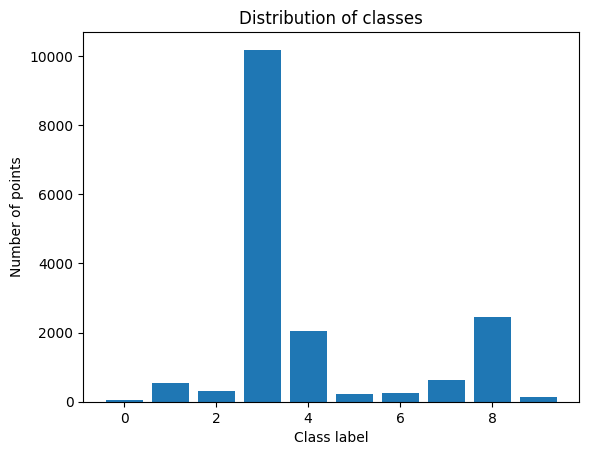

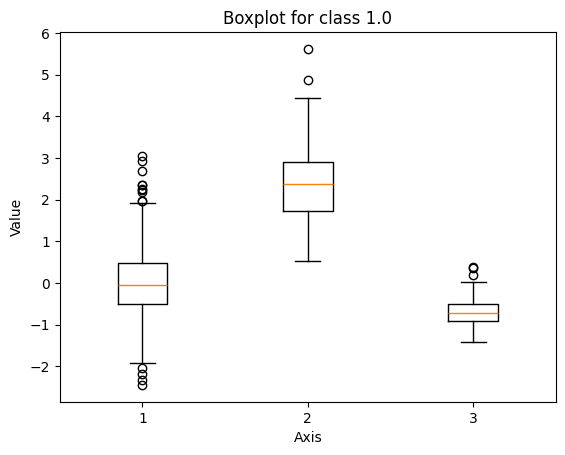

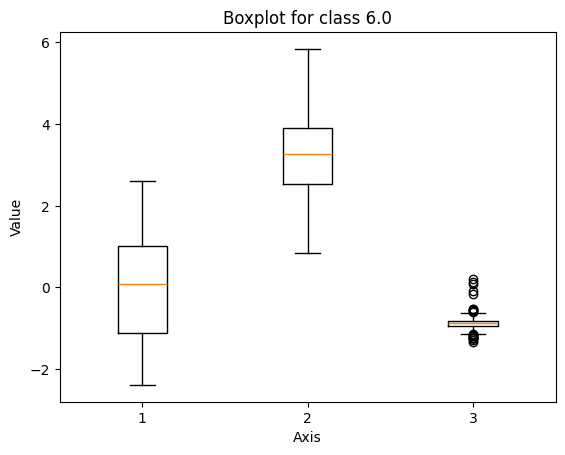

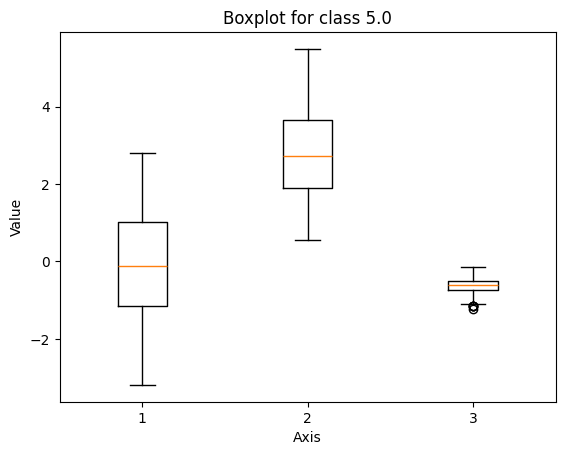

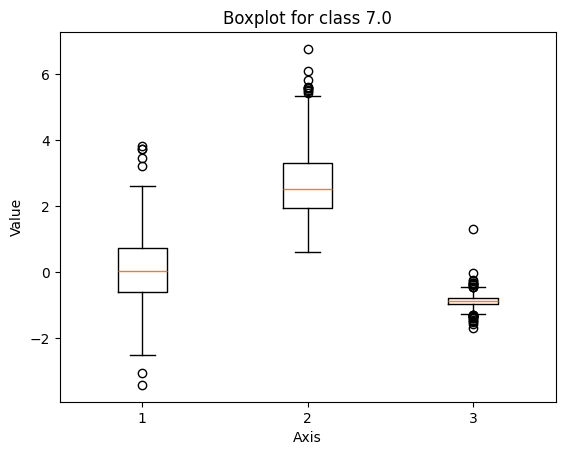

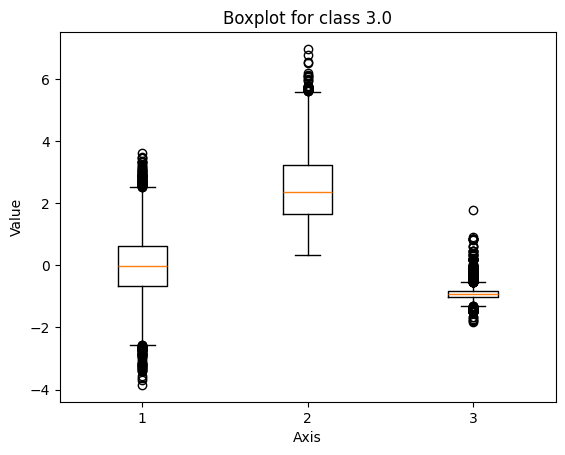

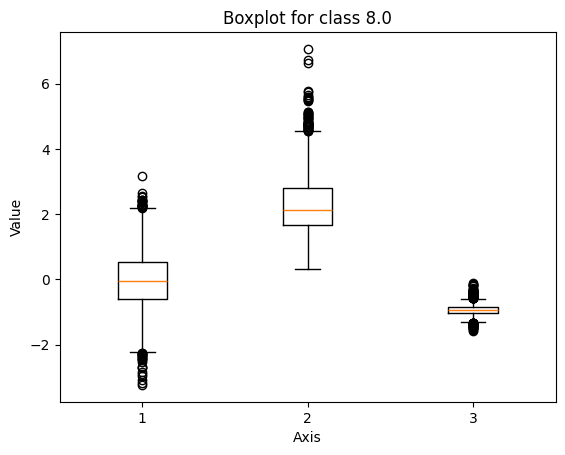

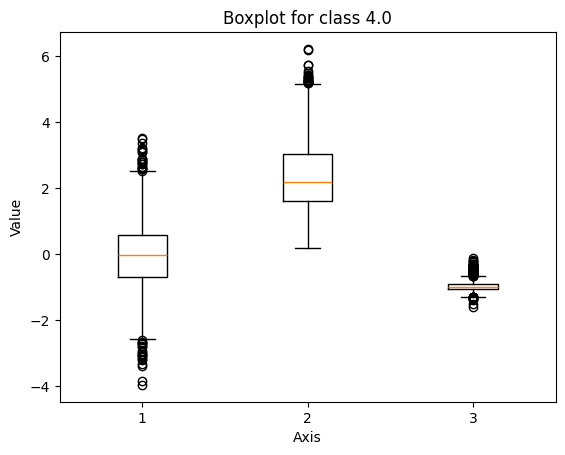

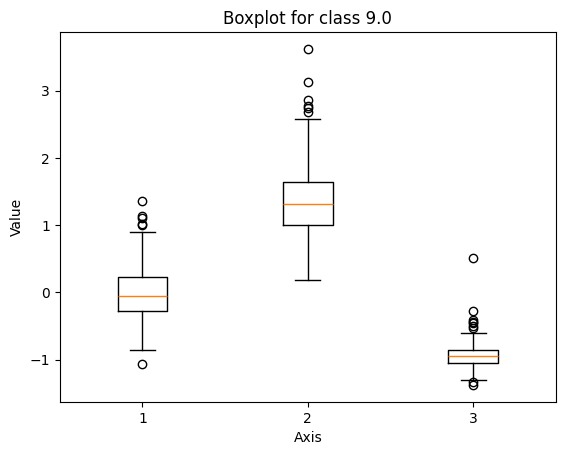

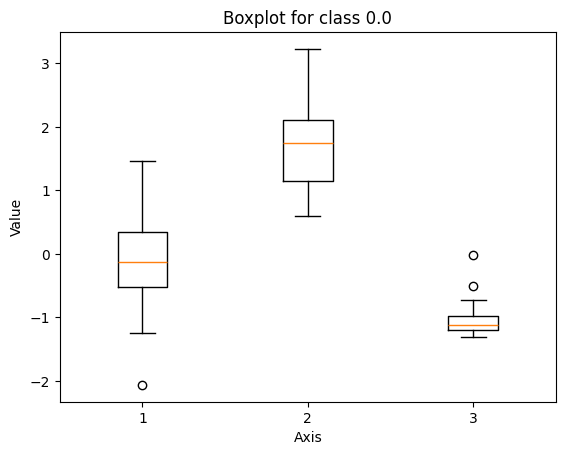

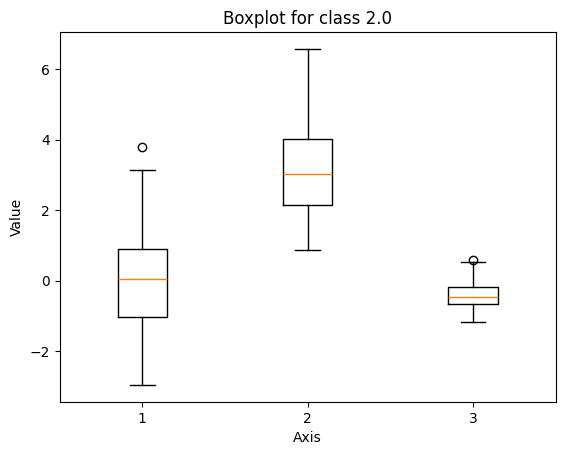

In [78]:
# Plot the distribution of the classes
plt.bar(class_dict.keys(), [len(class_dict[key]) for key in class_dict.keys()])
plt.xlabel('Class label')
plt.ylabel('Number of points')
plt.title('Distribution of classes')


# Find the boxplot for each classses' data
def analyze_classdict(class_dict):
    for key in class_dict.keys():
        data = class_dict[key]
        array = np.array(data)
        print(array.shape)

        x = array[:, 0]
        y = array[:, 1]
        z = array[:, 2]

        # Calculate the mean and standard deviation for each axis
        print(f"Class {key}:")
        print(f"Mean x: {np.mean(x)}")
        print(f"Mean y: {np.mean(y)}")
        print(f"Mean z: {np.mean(z)}")
        print(f"Std x: {np.std(x)}")
        print(f"Std y: {np.std(y)}")
        print(f"Std z: {np.std(z)}")

        # Plot individual boxplots for each class and each axis (x, y, z)
        plt.figure()
        plt.boxplot([x, y, z])
        plt.title(f'Boxplot for class {key}')
        plt.xlabel('Axis')
        plt.ylabel('Value')

    plt.show()

analyze_classdict(class_dict)

/var/folders/__/sxrs_frj41bdj4fb9smfcr9m0000gn/T/ipykernel_36377/633139136.py:46: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots()


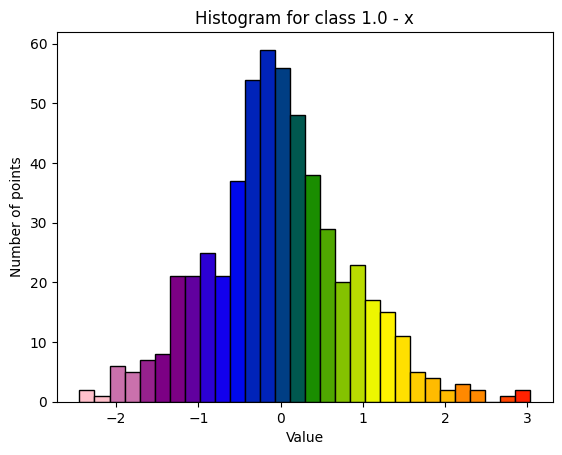

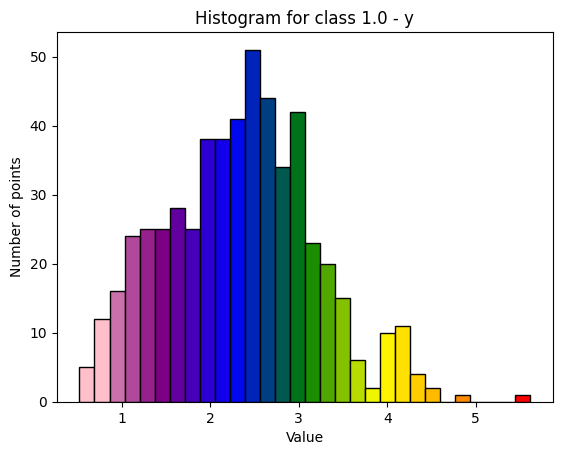

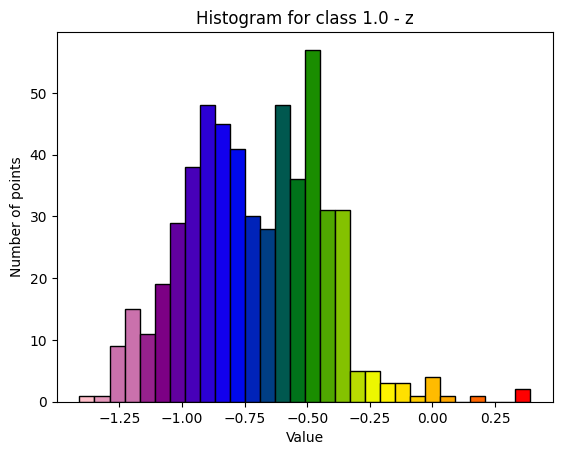

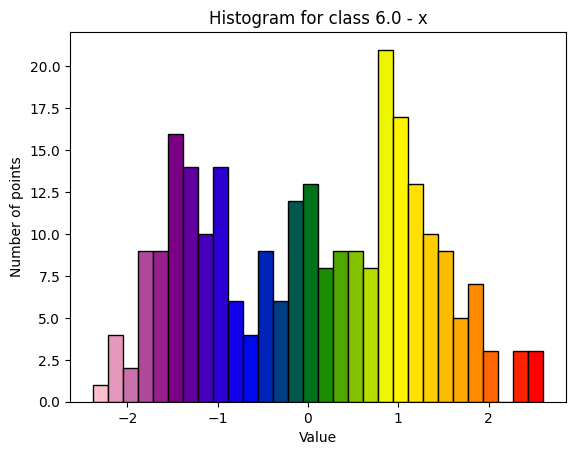

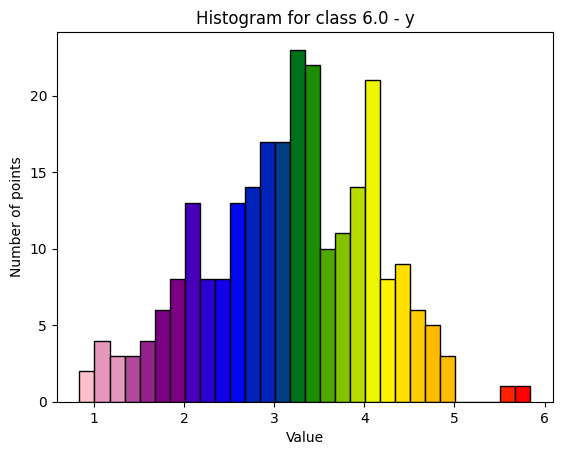

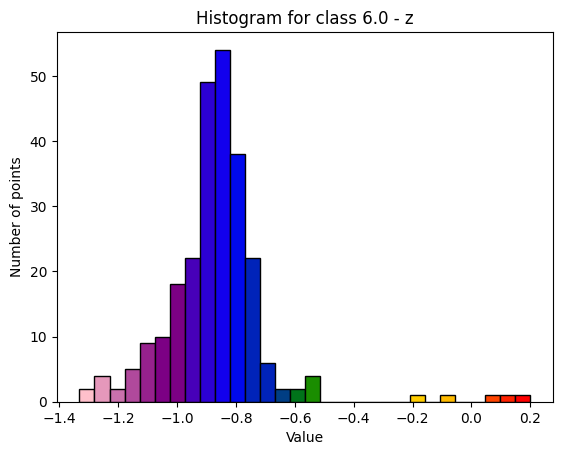

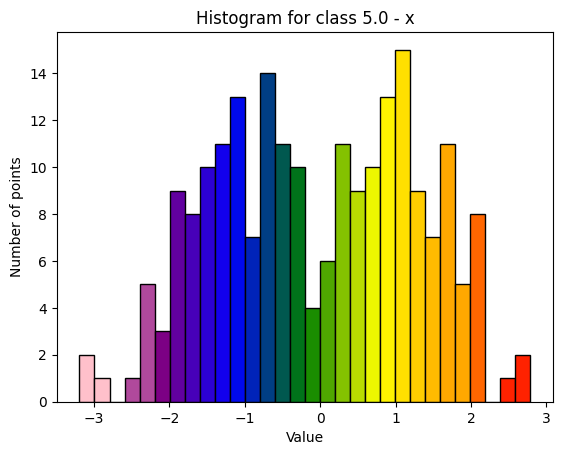

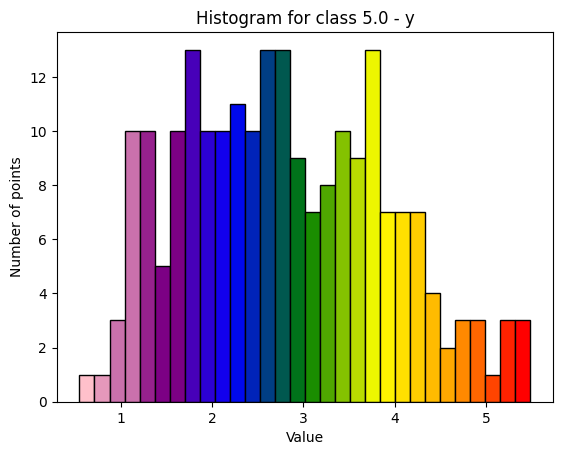

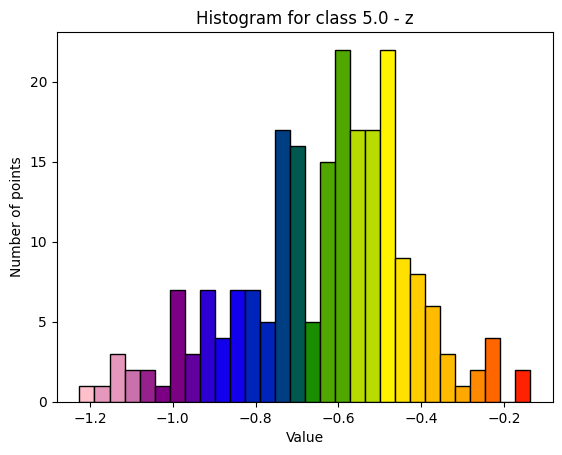

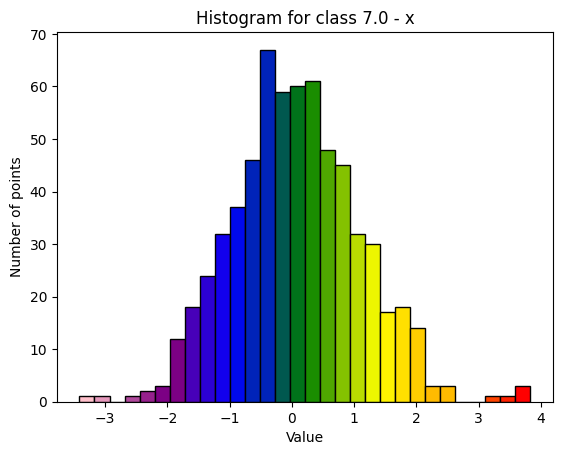

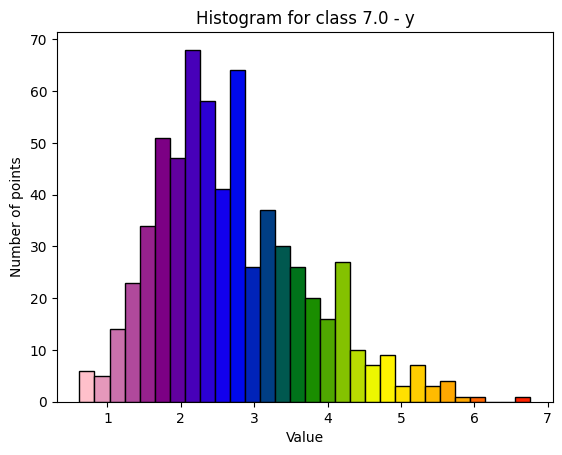

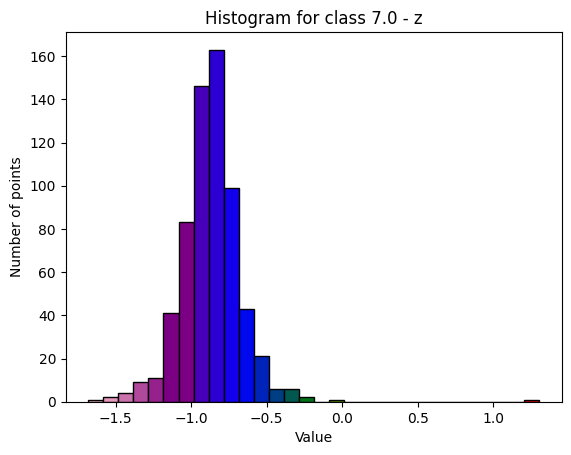

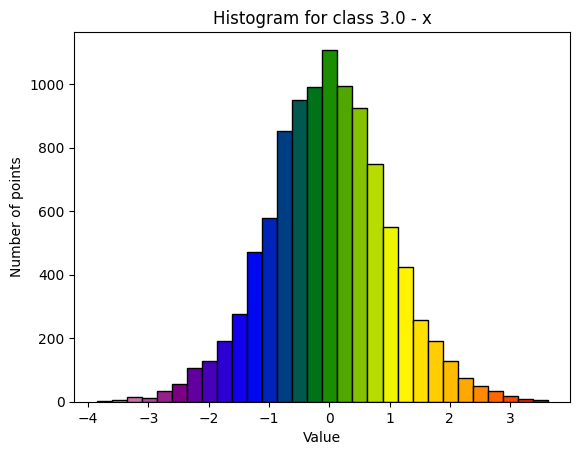

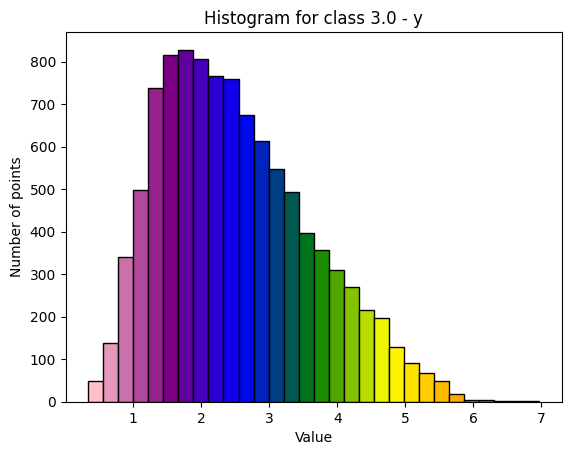

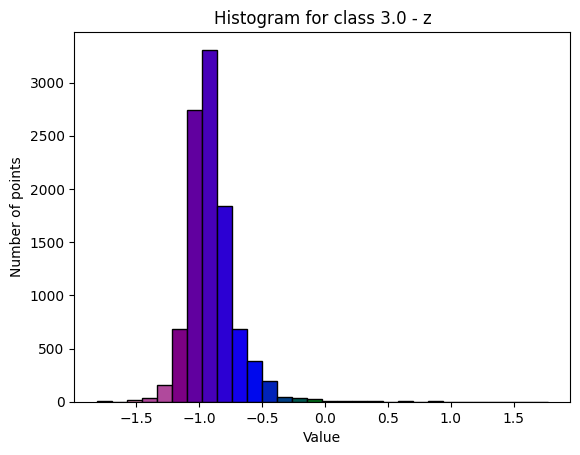

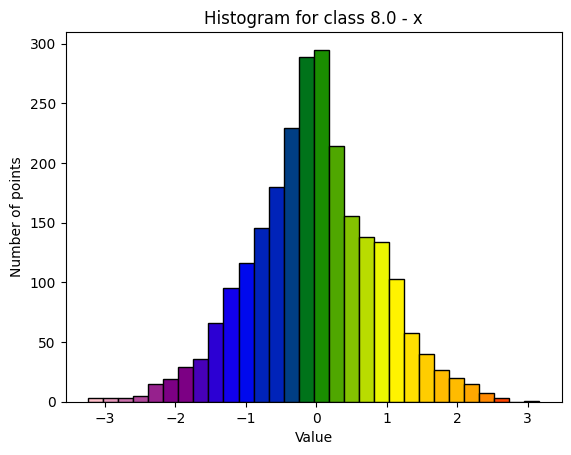

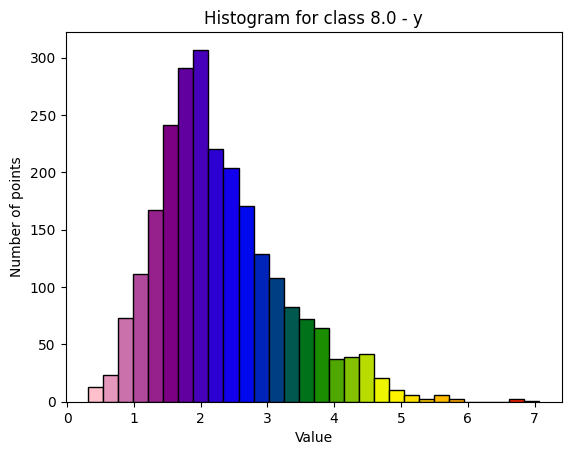

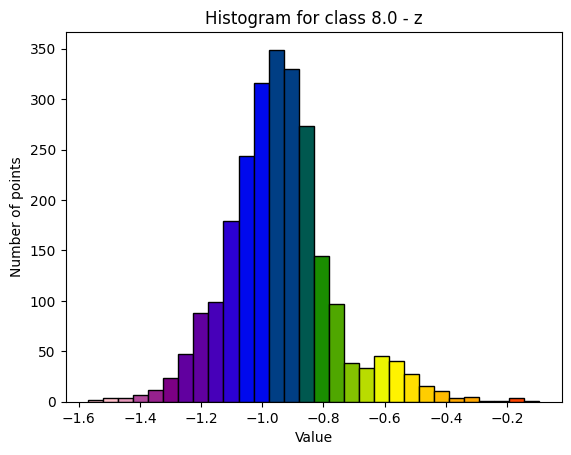

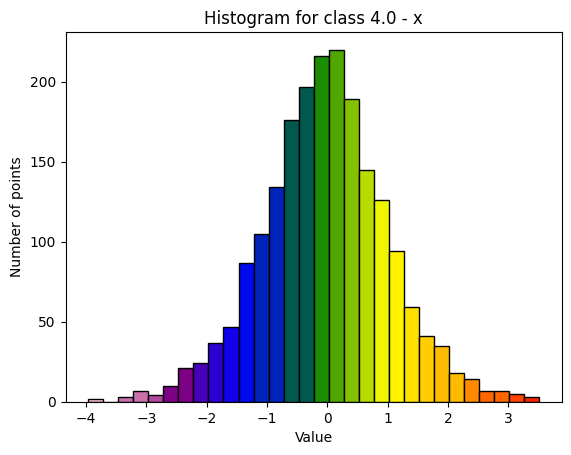

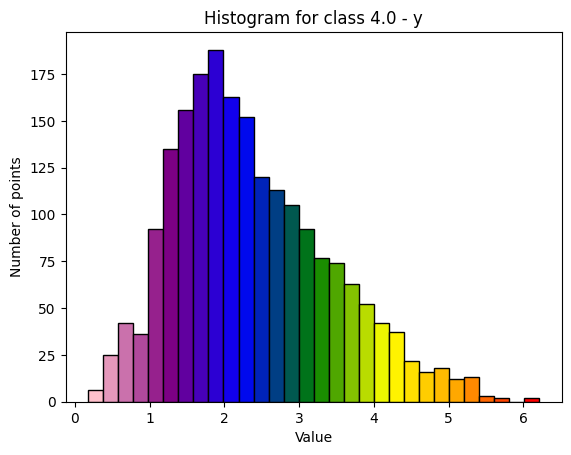

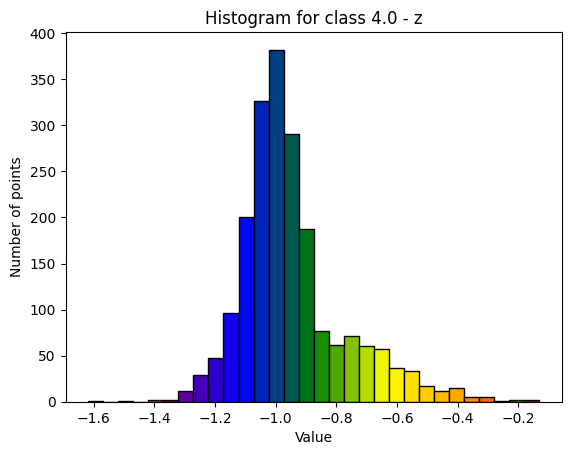

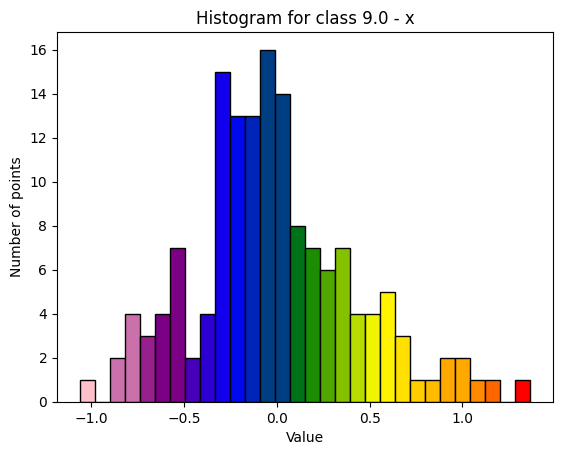

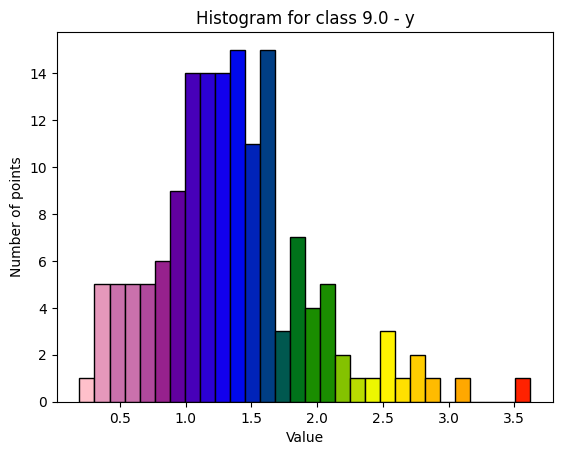

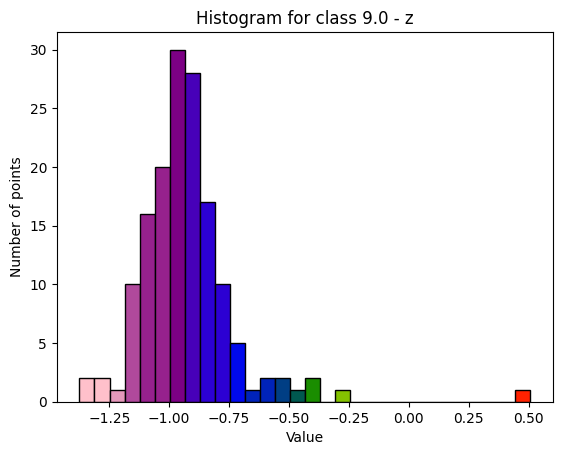

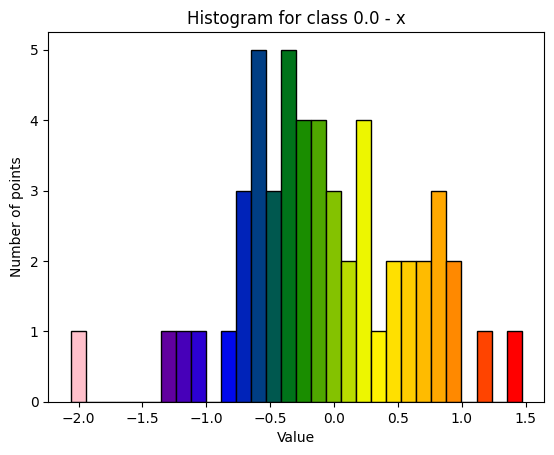

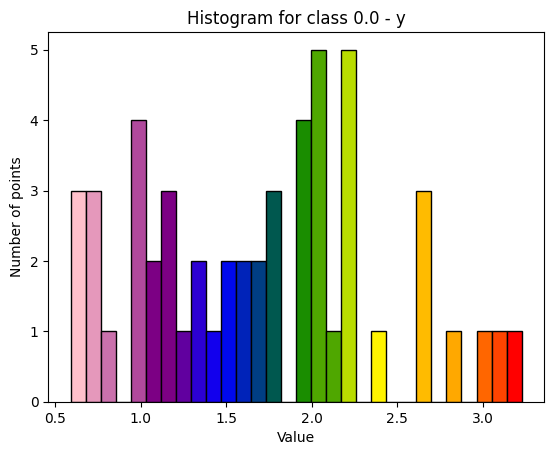

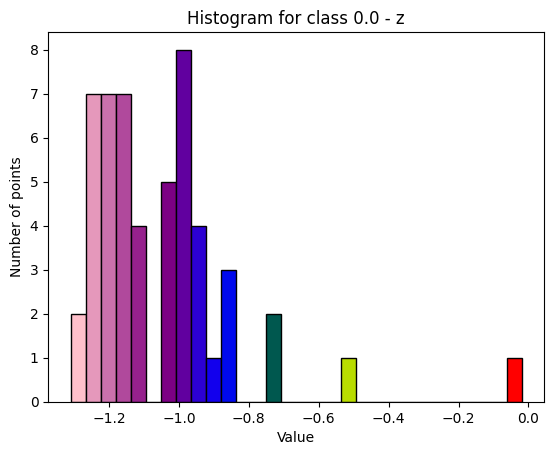

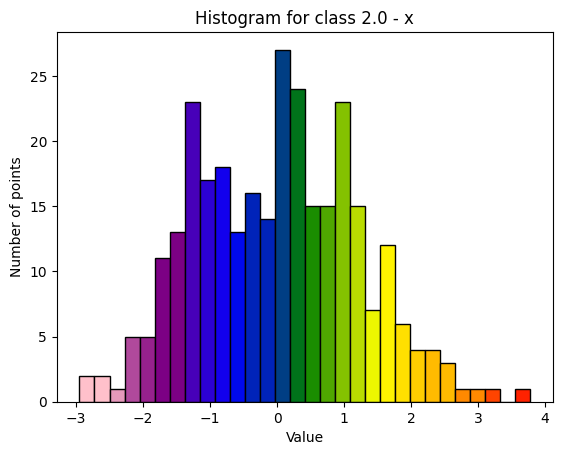

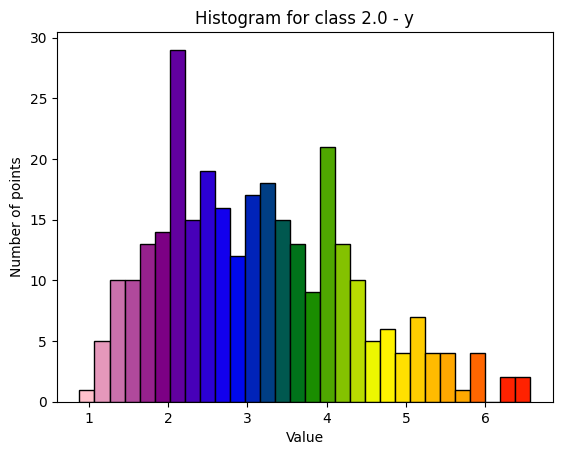

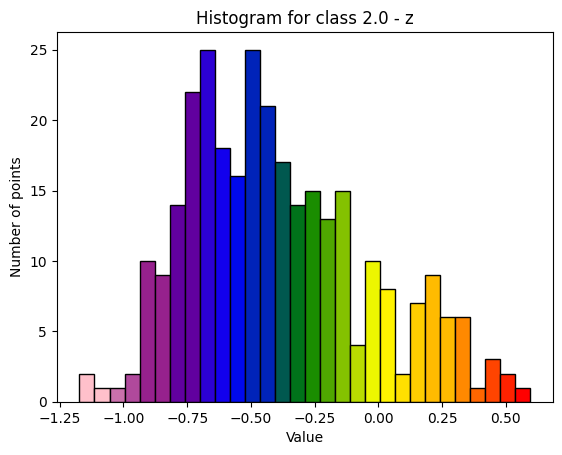

In [79]:
## Plot histograms for each class and each axis
## Height of the bars represent the number of points in that bin
## The bins are the values of the axis, and the number of bins can be adjusted
## The bins are colored in a gradient from pink to red, with pink representing the leftmost bin and red the rightmost bin

from matplotlib.colors import LinearSegmentedColormap

def plot_histograms(class_dict, bins=50):
    # Define a color map from pink to blue
    colors = ['#FFC0CB', '#800080', '#0000FF', '#008000', '#FFFF00', '#FFA500', '#FF0000']
    color_map = LinearSegmentedColormap.from_list('rainbow_color', colors, N=bins)

    for key in class_dict.keys():
        data = class_dict[key]
        array = np.array(data)

        x = array[:, 0]
        y = array[:, 1]
        z = array[:, 2]

        # Calculate histograms for x, y, z
        hist_x, bins_x = np.histogram(x, bins=bins)
        hist_y, bins_y = np.histogram(y, bins=bins)
        hist_z, bins_z = np.histogram(z, bins=bins)

        # Normalize bin indices to 0-1 scale for color mapping
        norm_x = plt.Normalize(bins_x.min(), bins_x.max())
        norm_y = plt.Normalize(bins_y.min(), bins_y.max())
        norm_z = plt.Normalize(bins_z.min(), bins_z.max())

        # Create plots for x, y, z with color gradients
        fig, ax = plt.subplots()
        for i in range(len(bins_x)-1):
            ax.bar(bins_x[i], hist_x[i], width=bins_x[i+1]-bins_x[i], color=color_map(norm_x(bins_x[i])), align='edge', edgecolor='black')
        ax.set_title(f'Histogram for class {key} - x')
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of points')

        fig, ax = plt.subplots()
        for i in range(len(bins_y)-1):
            ax.bar(bins_y[i], hist_y[i], width=bins_y[i+1]-bins_y[i], color=color_map(norm_y(bins_y[i])), align='edge', edgecolor='black')
        ax.set_title(f'Histogram for class {key} - y')
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of points')

        fig, ax = plt.subplots()
        for i in range(len(bins_z)-1):
            ax.bar(bins_z[i], hist_z[i], width=bins_z[i+1]-bins_z[i], color=color_map(norm_z(bins_z[i])), align='edge', edgecolor='black')
        ax.set_title(f'Histogram for class {key} - z')
        ax.set_xlabel('Value')
        ax.set_ylabel('Number of points')

    plt.show()

plot_histograms(class_dict, bins=30)

## Getting the class indices mappings:

In [67]:
import scipy.io
mat = scipy.io.loadmat('SUNRGBDtoolbox/Metadata/SUNRGBDMeta.mat')

# Read the metadata file
print(mat['SUNRGBDMeta'][0].shape) # 10335 training images
print(len(mat['SUNRGBDMeta'][0][0])) # 13 attributes for each image

for i in range(len(mat['SUNRGBDMeta'][0][0])):
    print(mat['SUNRGBDMeta'][0][0][i])

print(mat['SUNRGBDMeta'][0][0][1].shape) # 2nd attribute of image: 1 x # of bounding boxes/ objects
print(mat['SUNRGBDMeta'][0][0][1][0][0])
print(mat['SUNRGBDMeta'][0][0][1][0][0][3]) # retrieve the 4th attribute of the 1st bounding box
print(mat['SUNRGBDMeta'][0][0][1][0][1][3]) # retrieve the 4th attribute of the 2nd bounding box

# Get the class labels:

(10335,)
13
['SUNRGBD/kv2/kinect2data/000002_2014-05-26_14-23-37_260595134347_rgbf000103-resize']
[[(array([[ 0.99221595, -0.12452913,  0.        ],
         [ 0.12452913,  0.99221595,  0.        ],
         [ 0.        ,  0.        ,  1.        ]]), array([[0.94379202, 1.15103499, 0.98480693]]), array([[ 1.04730715,  4.16869579, -0.24685933]]), array(['bed'], dtype='<U3'), array([], dtype='<U1'), array(['SUNRGBD/kv2/kinect2data/000002_2014-05-26_14-23-37_260595134347_rgbf000103-resize'],
        dtype='<U81'), array([[-0.12452913, -0.99221595,  0.        ]]), array([[328, 152, 346, 320]], dtype=uint16), array([[1]], dtype=uint8))
  (array([[ 0.99686539, -0.0791163 ,  0.        ],
         [ 0.08304548,  0.99654576,  0.        ],
         [ 0.        ,  0.        ,  1.        ]]), array([[0.2872641, 0.2736726, 0.45     ]]), array([[ 2.43181818,  4.84090909, -0.75      ]]), array(['night_stand'], dtype='<U11'), array([], dtype='<U1'), array(['SUNRGBD/kv2/kinect2data/000002_2014-05-26_14

000103_bbox.npy
[[ 0.14101     1.451446   -0.775       0.384131    0.254281    0.425
   1.27692677  9.        ]]

**Metadata is image-level, each image can have multiple bounding boxes but they are not indexed.**

**Bounding Box data is bounding-box level, hence we are unable to get a mapping from bounding box index to image's bounding boxes.**

Training Set: SUN RGB-D dataset (10,355 RGB-D scene images) 

In [73]:
mat = scipy.io.loadmat('SUNRGBDtoolbox/Metadata/dection19list.mat')
print(mat['dection19list'])
print(mat['dection19list'].shape)

[[array(['bathtub'], dtype='<U7') array(['bed'], dtype='<U3')
  array(['bookshelf'], dtype='<U9') array(['box'], dtype='<U3')
  array(['chair'], dtype='<U5') array(['counter'], dtype='<U7')
  array(['desk'], dtype='<U4') array(['door'], dtype='<U4')
  array(['dresser'], dtype='<U7') array(['garbage_bin'], dtype='<U11')
  array(['lamp'], dtype='<U4') array(['monitor'], dtype='<U7')
  array(['night_stand'], dtype='<U11') array(['pillow'], dtype='<U6')
  array(['sink'], dtype='<U4') array(['sofa'], dtype='<U4')
  array(['table'], dtype='<U5') array(['tv'], dtype='<U2')
  array(['toilet'], dtype='<U6')]]
(1, 19)


In [74]:
mat = scipy.io.loadmat('SUNRGBDtoolbox/Metadata/seg37list.mat')
print(mat['seg37list'])
print(mat['seg37list'].shape)

[[array(['wall'], dtype='<U4') array(['floor'], dtype='<U5')
  array(['cabinet'], dtype='<U7') array(['bed'], dtype='<U3')
  array(['chair'], dtype='<U5') array(['sofa'], dtype='<U4')
  array(['table'], dtype='<U5') array(['door'], dtype='<U4')
  array(['window'], dtype='<U6') array(['bookshelf'], dtype='<U9')
  array(['picture'], dtype='<U7') array(['counter'], dtype='<U7')
  array(['blinds'], dtype='<U6') array(['desk'], dtype='<U4')
  array(['shelves'], dtype='<U7') array(['curtain'], dtype='<U7')
  array(['dresser'], dtype='<U7') array(['pillow'], dtype='<U6')
  array(['mirror'], dtype='<U6') array(['floor_mat'], dtype='<U9')
  array(['clothes'], dtype='<U7') array(['ceiling'], dtype='<U7')
  array(['books'], dtype='<U5') array(['fridge'], dtype='<U6')
  array(['tv'], dtype='<U2') array(['paper'], dtype='<U5')
  array(['towel'], dtype='<U5') array(['shower_curtain'], dtype='<U14')
  array(['box'], dtype='<U3') array(['whiteboard'], dtype='<U10')
  array(['person'], dtype='<U6') arr

In [75]:
mat = scipy.io.loadmat('SUNRGBDtoolbox/Metadata/seglistall.mat')
print(mat['seglistall'])
print(mat['seglistall'].shape)

[[array(['pool_balls'], dtype='<U10') array(['sideboard'], dtype='<U9')
  array(['extension_/_power_/_electrical_cord'], dtype='<U35') ...
  array(['car_batteries'], dtype='<U13')
  array(['pamphlets'], dtype='<U9') array(['jel_pack'], dtype='<U8')]]
(1, 6590)


**Three groups/sizes of labels are available, but unsure of how the index of the bounding box is mapped to these labels**

Useful GitHub repos that I have checked : 
* https://github.com/aegorfk/Mask_RCNN-for-SUN-RGB-D/blob/master/samples/sun/inspect_sun_data.ipynb

* https://github.com/ankurhanda/sunrgbd-meta-data

* https://github.com/arcosin/Sun-RGDB-Data-Extractor/blob/main/sunrgbd_dataset.py

## Identifying outliers and plot them as 3D Point clouds